In [2]:
time_to_A

array([[0., 0.],
       [0., 0.]])

In [3]:
time_to_B

array([[0.    , 0.    ],
       [0.5563, 0.41  ]])

In [5]:
count_A

array([1, 0], dtype=int8)

In [4]:
count_B

array([1, 2], dtype=int8)

In [3]:
count_No

array([0, 0], dtype=int8)

In [2]:
count_A

array([1, 0], dtype=int8)

********************************************
coherence_level=-0.1
simulating 480 neurons. Start: Wed Jun 15 13:33:46 2022
sim end: Wed Jun 15 13:35:25 2022
0. s 0.5847 s
t_A=0.0, t_B=0.5847000000000001
decision: B
********************************************
coherence_level=-0.5
simulating 480 neurons. Start: Wed Jun 15 13:35:26 2022
sim end: Wed Jun 15 13:37:05 2022
0. s 0.4497 s
t_A=0.0, t_B=0.4497
decision: B


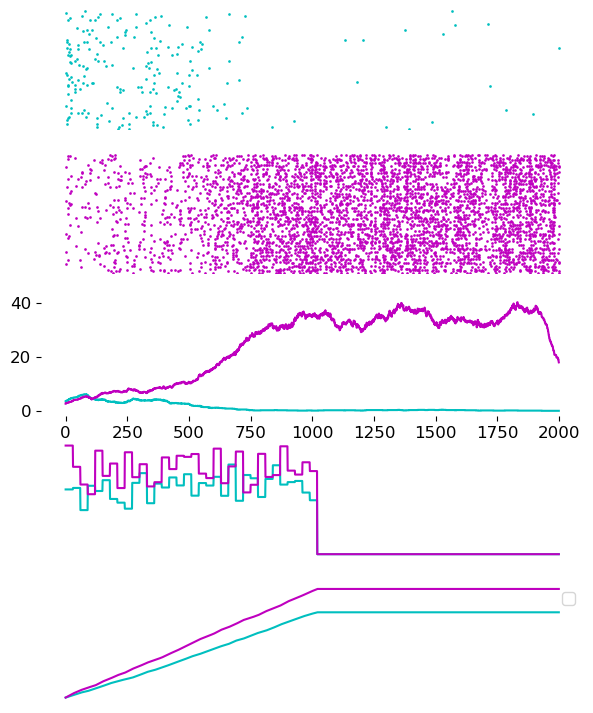

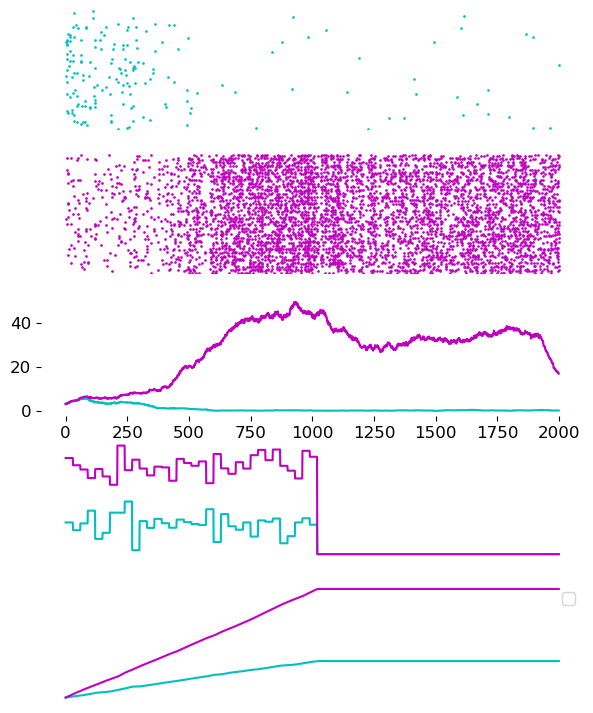

In [3]:
import wang 
import gdt
import brian2 as b2


coherence_levels = [-0.1, -0.5]  # for negative values, B is the correct decision.
nr_repetitions = 1

time_to_A, time_to_B, count_A, count_B, count_No = wang.run_multiple_simulations(gdt.get_decision_time ,coherence_levels, nr_repetitions,rate_threshold=15 * b2.Hz ) 

stimulus start: 0.0, stimulus end: 1.0
simulating 426 neurons. Start: Tue Jun 14 15:41:50 2022


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]
INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Tue Jun 14 15:43:22 2022


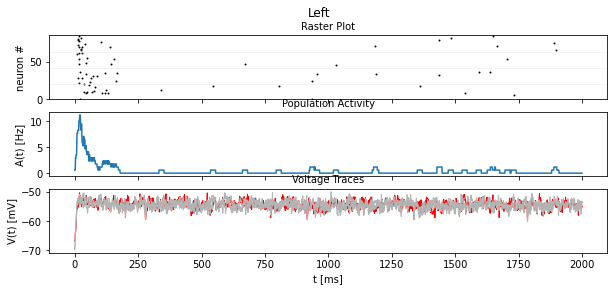

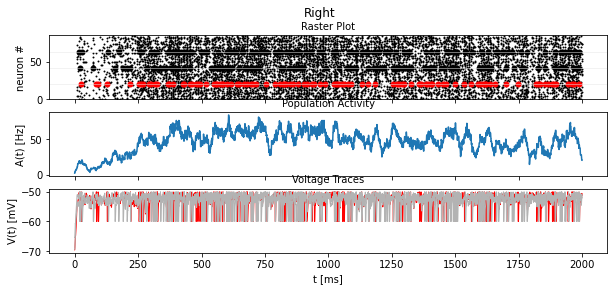

In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""
stim_start = 0. * b2.ms
stim_duration = 1000 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                      t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                      coherence_level=+0.0, w_pos=2.0, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                      max_sim_time=2000. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                 sup_title="Right")

plt.show()

In [24]:
# Remove which group wins 

import numpy
import brian2 as b2


#def get_decision_time(rateA, rateB, avg_window_width=120.1*b2.ms,  rate_threshold=45.6*b2.Hz):
    
    
    #find which pop wins at last
rate_threshold= 40*b2.Hz
rateA = results["rate_monitor_A"]
rateB = results["rate_monitor_B"]

avg_window_width = 100.1 * b2.ms
#(ax_rate) = plt.plot(figsize=(5,5))
#t_max  = 1500
#t_min = 0 
ts = rateA.t / b2.ms
#idx_rate = (ts >= t_min) & (ts <= t_max)
smoothed_rateA = rateA.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
smoothed_rateB = rateB.smooth_rate(window="flat", width=avg_window_width)/b2.Hz


# monitor each firing rate at every moment 
decision_time_A = 0*b2.ms

decision_time_B = 0*b2.ms

for i in range(len(ts)):
    smoothed_rateA[i]



# find the time when the divergen starts happening
threshold = rate_threshold/b2.Hz

above_thre_A = (smoothed_rateA > threshold)
idx_over_threshold_A = numpy.where(above_thre_A==True)


above_thre_B = (smoothed_rateB > threshold)
idx_over_threshold_B = numpy.where(above_thre_B==True)



if len(idx_over_threshold_A[0]) > 0:
    decision_time_A = idx_over_threshold_A[0][0];
    decision_time_A = (decision_time_A/10)*b2.ms
    
else: 
    pass

if idx_over_threshold_B:
    decision_time_B = idx_over_threshold_B[0][0];
    decision_time_B = (decision_time_B/10)*b2.ms

else: 
    pass


print(decision_time_A, decision_time_B)



0. s 246.4 ms


In [22]:
len(idx_over_threshold_A[0])

0

In [17]:
idx_over_threshold_A[0]

array([], dtype=int64)

In [10]:
import numpy
import brian2 as b2


#def get_decision_time(rateA, rateB, avg_window_width=120.1*b2.ms,  rate_threshold=45.6*b2.Hz):
    
    
    #find which pop wins at last
rate_threshold= 40*b2.Hz
rateA = results["rate_monitor_A"]
rateB = results["rate_monitor_B"]

avg_window_width = 100.1 * b2.ms
#(ax_rate) = plt.plot(figsize=(5,5))
#t_max  = 1500
#t_min = 0 
ts = rateA.t / b2.ms
#idx_rate = (ts >= t_min) & (ts <= t_max)
smoothed_rateA = rateA.smooth_rate(window="flat", width=avg_window_width)/b2.Hz
smoothed_rateB = rateB.smooth_rate(window="flat", width=avg_window_width)/b2.Hz


# monitor each firing rate at every moment 

for i in range(len(ts)):
    smoothed_rateA[i]


if (smoothed_rateB.max() < smoothed_rateA.max()):

    A_win = True
else:

    A_win = False


#get the firing rate differences between A and B

if A_win:
    rate_diff = smoothed_rateA - smoothed_rateB
    winner = 'A'


else:
    rate_diff = smoothed_rateB - smoothed_rateA
    winner = 'B'


# find the time when the divergen starts happening
threshold = rate_threshold/b2.Hz

above_thre = (rate_diff > threshold)
idx_over_threshold = numpy.where(above_thre==True)

decision_time = idx_over_threshold[0][0];

decision_time_in_ms = (decision_time/10)*b2.ms

if A_win:
    decision_time_A = decision_time_in_ms
    decision_time_B = 0*b2.ms

else:
    decision_time_A = 0*b2.ms
    decision_time_B = decision_time_in_ms



print(decision_time_A, decision_time_B)

0. s 246.4 ms


In [7]:
decision_time

2729

In [11]:
decision_time

2464

In [12]:
idx_over_threshold

(array([ 2464,  2465,  2466, ..., 19731, 19732, 19733], dtype=int64),)